<a href="https://colab.research.google.com/github/sharondenisse/MachineLearningNotebooks/blob/master/Numbers_FreeGPU_Jan2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First important step to follow inside Google Colab:
# Go to Edit > Notebook Settings 
# and change your Hardware Accelerator to GPU

In [2]:
x = 3
print(type(x))
!

<class 'int'>


In [0]:
# It's running Python smoothly!  HURRAY!
# Now, let's save how to import .py from the drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!pwd

/content


Hello Google Drive!

In [6]:
!ls

gdrive	sample_data


In [9]:
cd gdrive

/content/gdrive


In [10]:
ls

'My Drive'/


In [11]:
cd My\ Drive

/content/gdrive/My Drive


In [12]:
ls

 1126_001.pdf
'12-SDK_Endocrine disruptors in bottled water.pptx'
 1522672636_2262.pdf
'2009 EIT Review math SOLN(1).pdf'
 2013_FE_Env_practice_errata.v1.pdf
 21_environmental_engineering.pdf
 23me.pdf
 8173632390090770434.mp4
 85book-eng.pdf
'A Concise Introduction to Programming in Python, Second Edition.pdf'
 act1_h.mp4
 act2_h.mp4
 acting-senior-managers.pdf
 AD_2016_taxes.pdf
'AD 90 day notice.gdoc'
'Addtional CPM exercises for test prep.pdf'
 AD_signedTaxes2017.pdf
 AdvancedAirNoisePollutionControl.pdf
 Advanced_Jupyter.ipynb
 ALL_EPAwork/
'All Professional Engineering Positions 0800.pdf'
 AlternativeWorkLocationSKenny.pdf
'A Mind For Numbers How to Excel at Math and Science .epub'
 AMK_firstProgram.flv
 AMK_LanguageAndHealthReport.pdf
 applied_physics_ii_exam3_sol.pdf
 ApprovalOutsideEmployment2017.pdf
 appSDK/
 AP_Stat_summer_packet.pdf
 ArcGIS_API_Tutorial.pdf
 ArcpyFunctionsClasses.xlsx
 ArcPyPro.pdf
'Arctic Council.gdoc'
'Arctic Frontiers 2017.pdf'
 Asgn_2_Graph_Transformati

In [14]:
with open('/content/gdrive/My Drive/foo3.txt', 'w') as f:
  f.write('Hello Google Drive3!')
!cat /content/gdrive/My\ Drive/foo3.txt

Hello Google Drive3!

In [0]:
!pip install -q keras

In [0]:
# I saved the .py file in my Google Drive directly
#!python3 "/content/drive/My Drive/appSDK/mnist_cnn.py"
# But you can use the code below to do so too

# Now, if you know where a file sits online, you can save it with this code:
#!wget https://THE_URL/NAME_FILE.csv -P "/content/drive/My Drive/appSDK"
# where "THE_URL" and "NAME_FILE" should be replaced with real info

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IMG_0774.JPG to IMG_0774.JPG
User uploaded file "IMG_0774.JPG" with length 1091393 bytes


In [0]:
# MACHINE LEARNING STARTS



from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

#loading mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

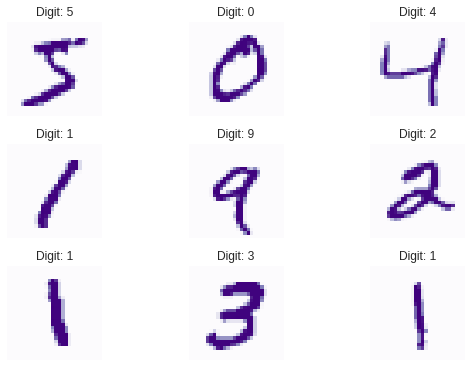

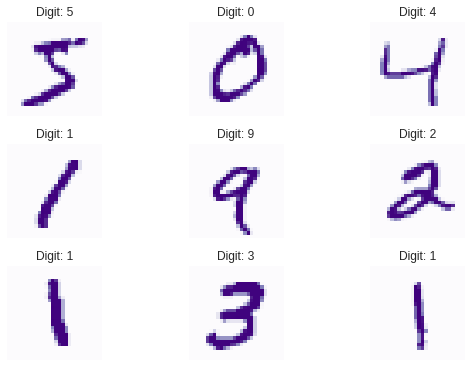

In [20]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='Purples', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


fig

In [21]:
#Processing image information
#reshaping
#this assumes our data format
#from keras import backend as k

# input image dimensions
img_rows, img_cols = 28, 28
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 
#X_train shape should be: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [22]:
print(X_train.shape[0], 'train samples, as stated above')
print(X_test.shape[0], 'test samples')

60000 train samples, as stated above
10000 test samples


In [23]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [24]:
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
##model building
from keras import layers
model = keras.Sequential()
#Conv2D = keras.layers.Conv2D
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(keras.layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(keras.layers.Flatten())
#fully connected to get all relevant data
model.add(keras.layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(keras.layers.Dense(num_category, activation='softmax'))

In [0]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [27]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.2640 - acc: 0.9205 - val_loss: 0.0621 - val_acc: 0.9792
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0925 - acc: 0.9721 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0667 - acc: 0.9801 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0560 - acc: 0.9838 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0461 - acc: 0.9860 - val_loss: 0.0314 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0420 - acc: 0.9877 - val_loss: 0.0260 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0270 -

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.027673578578275192
Test accuracy: 0.9911


In [0]:
# WHAT !!!  lol  lol
#  Test loss: 2.3010077346801756
#  Test accuracy: 0.1135
# Let me run again...  Going up from the top


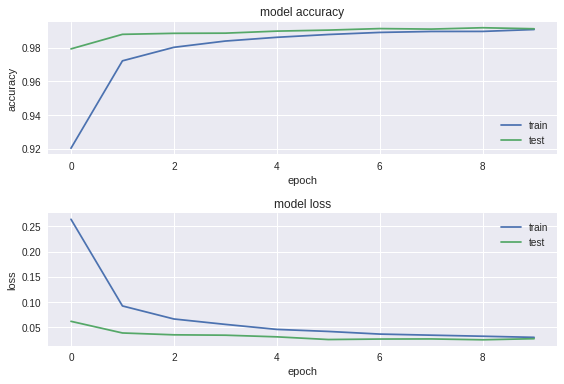

In [29]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

This part I do not understand... The saving as a json file...
Nevertheless, let's follow the recommendations to the dot.

In [30]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
!pwd

/content/gdrive/My Drive


In [37]:
ls *h5

model_digit.h5


In [42]:
mv 'model_digit.h5' 'appSDK/model_digit.h5'
mv 'model_digit.json' 'appSDK/model_digit.json'
mv 'sample_data' 'appSDK/sample_data'

mv: cannot stat 'sample_data': No such file or directory


In [44]:
# Let's go into our appSDK folder
# and see if things were moved successfully 
import os
os.chdir('appSDK')
!pwd

/content/gdrive/My Drive/appSDK


In [45]:
ls

client.py              mnist_cnn.py.gdoc  sdk4.png
custom_model.py        model_digit.h5     seven.png
demoDeployModel.ipynb  model_digit.json   tutorialFreeGPU_Jan2019.ipynb
mnist_cnn.py           sample_data/       ValeNumberML2.png


# Deploying the Model into Production
## This is a very difficult task, and Colab can't do
## because it does not support docker  :(

In [46]:
!git clone --recursive https://github.com/tensorflow/serving

Cloning into 'serving'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 14782 (delta 35), reused 15 (delta 6), pack-reused 14735
Receiving objects: 100% (14782/14782), 4.17 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (10841/10841), done.
Checking out files: 100% (460/460), done.


In [0]:
%cd serving
!ls

/content/serving
AUTHORS		 LICENSE    RELEASE.md		third_party  WORKSPACE
CONTRIBUTING.md  README.md  tensorflow_serving	tools


In [47]:
!docker build --pull -t $USER/tensorflow-serving-devel -f tensorflow_serving/tools/docker/Dockerfile.devel .

/bin/bash: docker: command not found


In [0]:
# Docker not found :(

In [0]:
#https://www.youtube.com/watch?v=T_afaArR0E8&vl=en

In [48]:
import tensorflow as tf
tf.test.gpu_device_name()
# If the response is empty, like this: '' 
# then I am only using CPU

'/device:GPU:0'

In [49]:
# Let's check which GPU  
# BTW, the only one Colab has is Tesla K80
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9155122221622989396, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3711437516530450815
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15292955908235277963
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15117557106503538006
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
# To restart this notebook
# use this code: !kill -9 -1
!kill -9 -1

In [0]:
#References:

#https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

In [0]:
import numpy as np
from PIL import Image

In [0]:
img = np.invert(Image.open('seven.png').convert('L')).ravel()

In [53]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
n_train = mnist.train.num_examples # 55,000
n_validation = mnist.validation.num_examples # 5000
n_test = mnist.test.num_examples # 10,000

In [0]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

In [0]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

In [0]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [0]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [60]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [63]:
# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

Iteration 0 	| Loss = 3.396916 	| Accuracy = 0.140625
Iteration 100 	| Loss = 0.37409624 	| Accuracy = 0.9140625
Iteration 200 	| Loss = 0.3337822 	| Accuracy = 0.875
Iteration 300 	| Loss = 0.33855408 	| Accuracy = 0.890625
Iteration 400 	| Loss = 0.3903952 	| Accuracy = 0.8671875
Iteration 500 	| Loss = 0.28352693 	| Accuracy = 0.9375
Iteration 600 	| Loss = 0.28488943 	| Accuracy = 0.9140625
Iteration 700 	| Loss = 0.20667103 	| Accuracy = 0.9375
Iteration 800 	| Loss = 0.22423747 	| Accuracy = 0.9296875
Iteration 900 	| Loss = 0.43030754 	| Accuracy = 0.8671875


In [64]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9148


In [65]:
prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 6


In [0]:
img2 = np.invert(Image.open('sdk4.png').convert('L')).ravel()

In [76]:
prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img2]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 7


In [77]:
img2

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [75]:
img

array([  0,   0,   5, 113, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 123,  12,   0,   0,   0,   0,
         0,   0,   0,   0,   9, 225, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 244,  22,   0,   0,
         0,   0,   0,   0,   0,   0,   9, 225, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 244,  22,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 255, 255,
       129,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 255,
       255, 205,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
       225, 255, 249,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   